In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")


In [2]:
data = pd.read_csv('dataset/preprocessed.csv')

In [8]:
data.info() #Fix the size difference: 2 NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
Review          49998 non-null object
Polarity        50000 non-null int64
Useful          50000 non-null int64
ReviewLength    50000 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
data.iloc[33902]

Review            NaN
Polarity            0
Useful              3
ReviewLength    50000
Name: 33902, dtype: object

In [10]:
data = data[data['Review'].notna()]

In [21]:
#Adding length of clean review 

reviewLen = data.apply(lambda row: len(row.Review), axis = 1)
data['ReviewLength'] = reviewLen

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
data.head()

,Review,Polarity,Useful,ReviewLength
0,always go toms mesa cause work love try locati...,0,1,244
1,great tacos opinion better tacos el gordo grea...,1,0,124
2,hands favorite sushi restaurant vegas could gi...,1,1,164
3,great find menu great selection vegetarian mea...,1,2,279
4,macarons soo unique compared french macarons l...,1,0,258


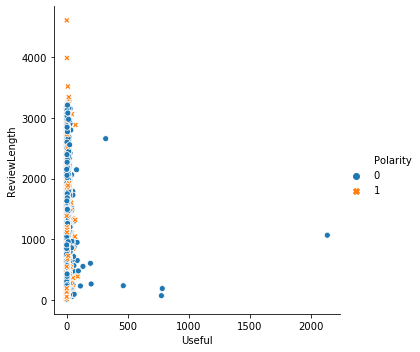

In [26]:
sns.relplot(x="ReviewLength", y="Useful", hue="Polarity", style="Polarity",  data=data)

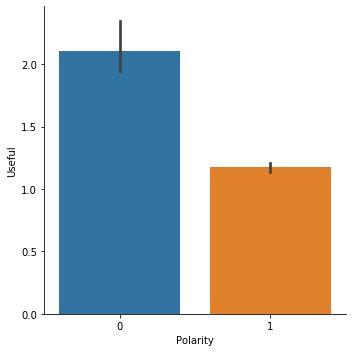

In [37]:
sns.catplot(x="Polarity", y="Useful", kind='bar' ,data=data)

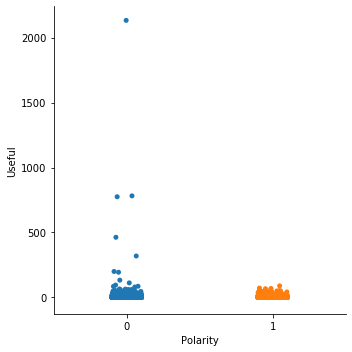

In [35]:
sns.catplot(x="Polarity", y="Useful" ,data=data)